In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler


In [24]:
# Load the dataset
df = pd.read_csv('/Users/lucasmazza/Desktop/AusElectData/AusElectrical.ipynb/electricity-normalized.csv')  # Replace with the actual filename or URL
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


In [10]:
#check the distibution of UP and down 
UP = df[df['class'] == "UP"]
print(len(UP))

DOWN = df[df['class'] == "DOWN"]
print(len(UP))

#perfect disitribution of labels, no imbalances

19237
19237


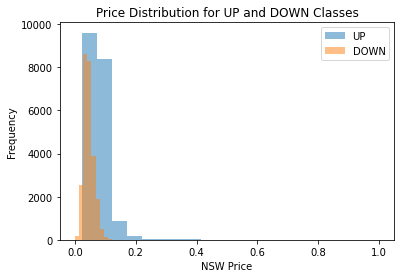

In [121]:

up_prices = UP['nswprice']
down_prices = DOWN['nswprice']

# Plotting histograms for price distributions
plt.hist(up_prices, bins=20, alpha=0.5, label='UP')
plt.hist(down_prices, bins=20, alpha=0.5, label='DOWN')
plt.xlabel('NSW Price')
plt.ylabel('Frequency')
plt.title('Price Distribution for UP and DOWN Classes')
plt.legend()
plt.show()

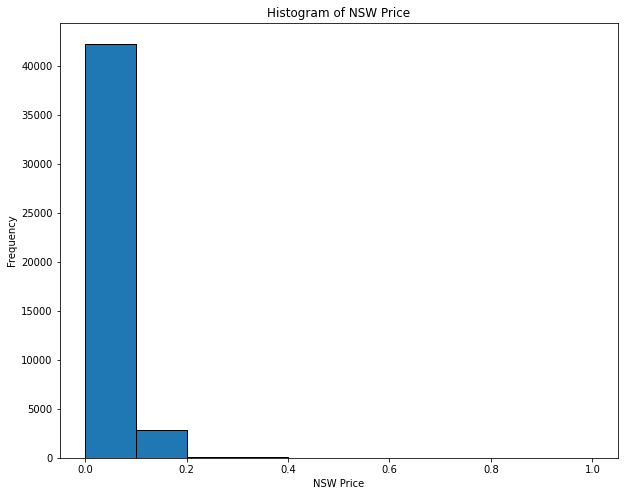

In [111]:
nsw_price = df['nswprice']
plt.figure(figsize=(10, 8))
# Plotting the histogram
plt.hist(nsw_price, bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('NSW Price')
plt.ylabel('Frequency')
plt.title('Histogram of NSW Price')

# Displaying the plot
plt.show()


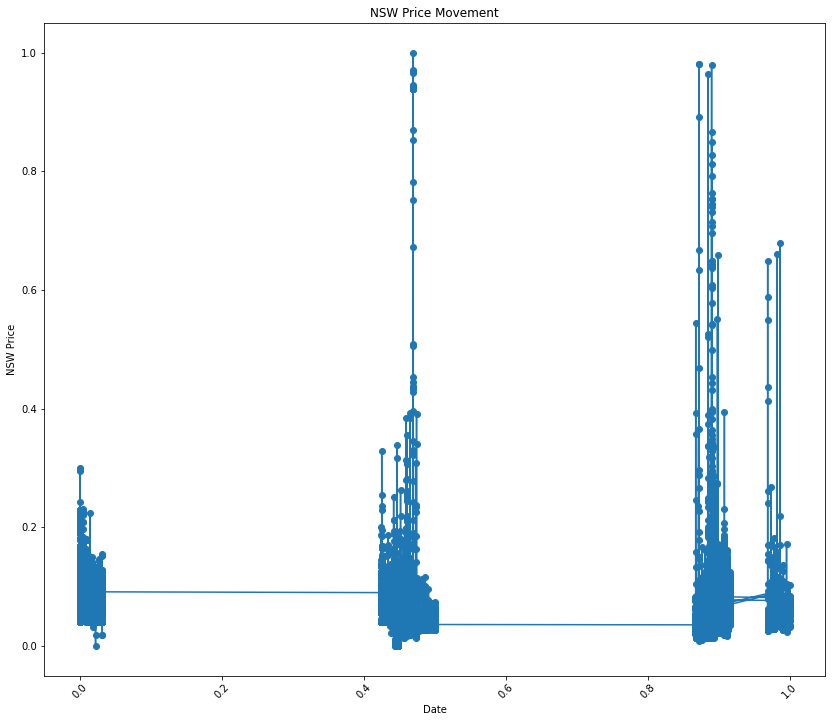

In [120]:
nsw_price = df['nswprice']
date = df['date']
plt.figure(figsize=(14, 12))

# Plotting the price movement
plt.plot(date, nsw_price, marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('NSW Price')
plt.title('NSW Price Movement')

# Rotating x-axis tick labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [72]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1


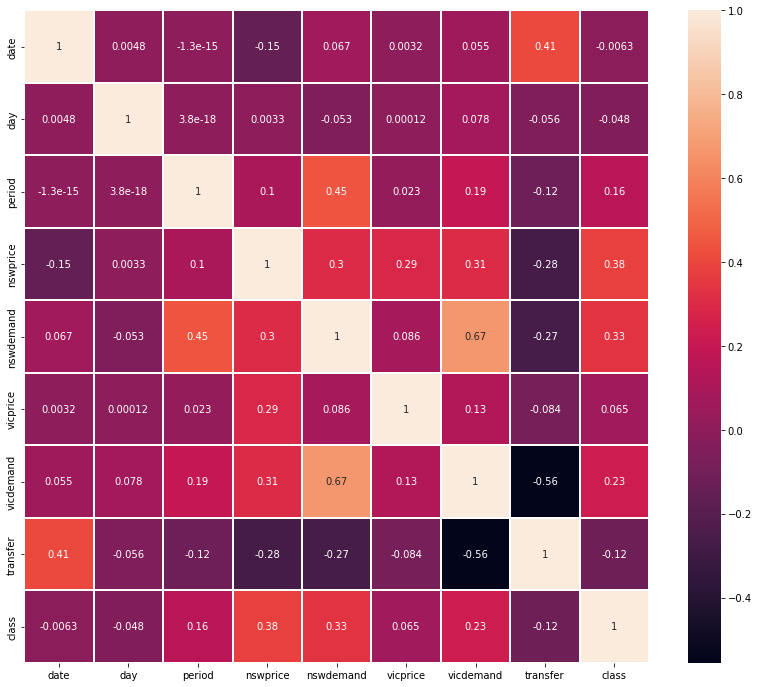

In [79]:
#check correlation of variables
plt.figure(figsize=(14, 12))

corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.1)


# Display the plot
plt.show()

In [123]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Base accuracy: ' + str(accuracy))

Base accuracy: 0.9106223333823745


In [25]:

## Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical column
df['class']= label_encoder.fit_transform(df['class'])

In [26]:
# Assuming your DataFrame is named 'df' and the column containing normalized dates is named 'Normalized_Date'
start_date = pd.to_datetime('7 May 1996')
end_date = pd.to_datetime('5 December 1998')

# Assuming the normalized dates are stored as a numerical value between 0 and 1
normalized_dates = df['date']

# Convert the normalized dates back to actual dates
actual_dates = start_date + pd.to_timedelta(normalized_dates * (end_date - start_date))

# Assign the actual dates to a new column in the DataFrame
df['Actual_Date'] = actual_dates
df['Actual_Date'] = pd.to_datetime(df['Actual_Date'], format='%Y-%m-%d').dt.date


In [27]:
df['Actual_Date'] = pd.to_datetime(df['Actual_Date'], format='%Y-%m-%d %H:%M:%S.%f')

In [28]:
df['Month'] = pd.DatetimeIndex(df['Actual_Date']).month

In [29]:
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                  'Spring' if x in [3, 4, 5] else
                                  'Summer' if x in [6, 7, 8] else
                                  'Autumn' if x in [9, 10, 11] else 'Unknown')

In [30]:
SeasonData = df.groupby('Season')
SeasonData = SeasonData[['nswprice', 'nswdemand', 'vicprice', 'vicdemand']]
print(SeasonData.describe())

       nswprice                                                              \
          count      mean       std       min       25%       50%       75%   
Season                                                                        
Autumn   4848.0  0.063190  0.033792  0.016002  0.043263  0.052945  0.081632   
Spring   8832.0  0.070586  0.028852  0.000060  0.046385  0.066110  0.084514   
Summer  31584.0  0.053482  0.042628  0.000000  0.030924  0.044134  0.066410   
Winter     48.0  0.066537  0.014620  0.031554  0.054281  0.072385  0.076040   

                 nswdemand            ...  vicprice           vicdemand  \
             max     count      mean  ...       75%       max     count   
Season                                ...                                 
Autumn  0.678876    4848.0  0.400214  ...  0.005404  0.358386    4848.0   
Spring  0.299327    8832.0  0.435161  ...  0.003467  0.003467    8832.0   
Summer  1.000000   31584.0  0.426529  ...  0.003467  1.000000   31584.0

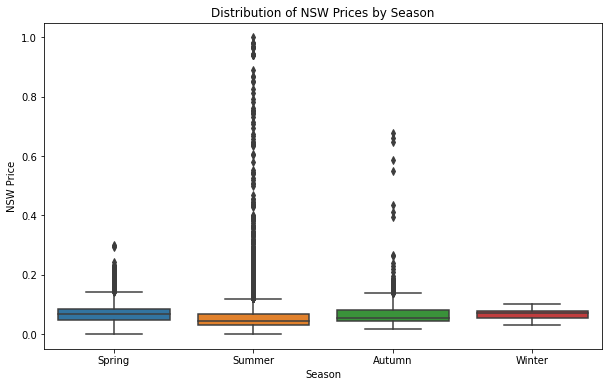

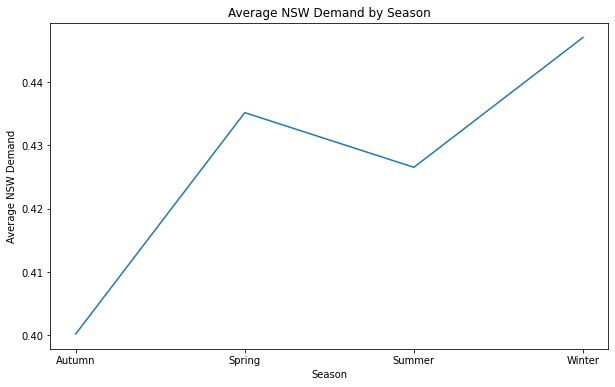

In [31]:
# Box plots for prices by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='nswprice')
plt.title('Distribution of NSW Prices by Season')
plt.xlabel('Season')
plt.ylabel('NSW Price')
plt.show()

avg_demands = df.groupby('Season')['nswdemand'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_demands.index, avg_demands.values)
plt.title('Average NSW Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average NSW Demand')
plt.show()


In [32]:
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,Actual_Date,Month,Season
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1,1996-05-07,5,Spring
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1,1996-05-07,5,Spring
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1,1996-05-07,5,Spring
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1,1996-05-07,5,Spring
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0,1996-05-07,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0,1998-09-16,9,Autumn
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0,1998-09-16,9,Autumn
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0,1998-09-16,9,Autumn
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1,1998-09-16,9,Autumn


In [34]:
# Load the dataset and select relevant features

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']  
selected_features = ['nswprice', 'nswdemand']  


filtered_data = pd.DataFrame()

# Iterate over each season
for season in seasons:
    # Filter the data for the current season
    season_data = df[df['Season'] == season]
    
    # Select the relevant features and normalize them
    X = season_data[selected_features]
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    
    # Train the One-Class SVM model
    svm = OneClassSVM()
    svm.fit(X_normalized)
    
    # Make predictions on the entire dataset
    y_pred = svm.predict(X_normalized)
    
    # Filter out the anomalies
    filtered_season_data = season_data[y_pred == 1]
    
    # Reset the index of the filtered data
    filtered_season_data.reset_index(drop=True, inplace=True)
    
    # Append the filtered data to the overall filtered dataset
    filtered_data = filtered_data.append(filtered_season_data)

# Reset the index of the filtered data
filtered_data.reset_index(drop=True, inplace=True)



<ipython-input-34-ab46730bc3b0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(filtered_season_data)
<ipython-input-34-ab46730bc3b0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(filtered_season_data)
<ipython-input-34-ab46730bc3b0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(filtered_season_data)
<ipython-input-34-ab46730bc3b0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append(filtered_season_data)


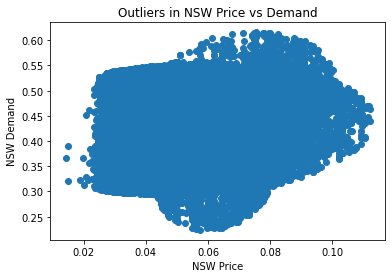

In [35]:
plt.scatter(filtered_data['nswprice'], filtered_data['nswdemand'])
plt.xlabel('NSW Price')
plt.ylabel('NSW Demand')
plt.title('Outliers in NSW Price vs Demand')
plt.show()

In [189]:

## Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical column
df['Season']= label_encoder.fit_transform(df['Season'])



In [200]:
df = df.drop('Actual_Date', axis = 1)

In [85]:
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,Actual_Date,Month,Season
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1,1996-05-07,5,1
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1,1996-05-07,5,1
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1,1996-05-07,5,1
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1,1996-05-07,5,1
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0,1996-05-07,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,0,1998-09-16,9,0
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,0,1998-09-16,9,0
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,0,1998-09-16,9,0
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,1,1998-09-16,9,0


In [86]:
df['price_demand_interaction'] = df['nswprice'] * df['nswdemand']
df['price_transfer_interaction'] = df['nswprice'] * df['transfer']

In [88]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Create the XGBoost classifier object
xgb_clf = xgb.XGBClassifier()

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3)

# Fit the grid search on your training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.9081908807210861


In [90]:
y_pred = grid_search.predict(X_test)

[1 1 0 ... 0 0 1]


In [91]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9200382521700751


In [92]:
# Retrieve the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Get the feature importance scores from the best estimator
importance = best_estimator.get_booster().get_score(importance_type='weight')
feature_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, score in feature_importance:
    
    print(f"Feature: {feature}, Score: {score}")

Feature: date, Score: 5461.0
Feature: nswprice, Score: 2615.0
Feature: period, Score: 1895.0
Feature: nswdemand, Score: 1432.0
Feature: day, Score: 1397.0
Feature: price_transfer_interaction, Score: 1238.0
Feature: vicdemand, Score: 1138.0
Feature: price_demand_interaction, Score: 1104.0
Feature: vicprice, Score: 916.0
Feature: transfer, Score: 864.0
Feature: Season, Score: 22.0


In [95]:
from sklearn.metrics import mean_squared_error


# Assuming you have the actual labels (y_test) and the predictions
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.2827750834672761


In [96]:
# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Cross-Validation Results:')
print('Average Accuracy:', cv_results.mean())
print('Standard Deviation:', cv_results.std())

Cross-Validation Results:
Average Accuracy: 0.9121203513900454
Standard Deviation: 0.0021014886293994734


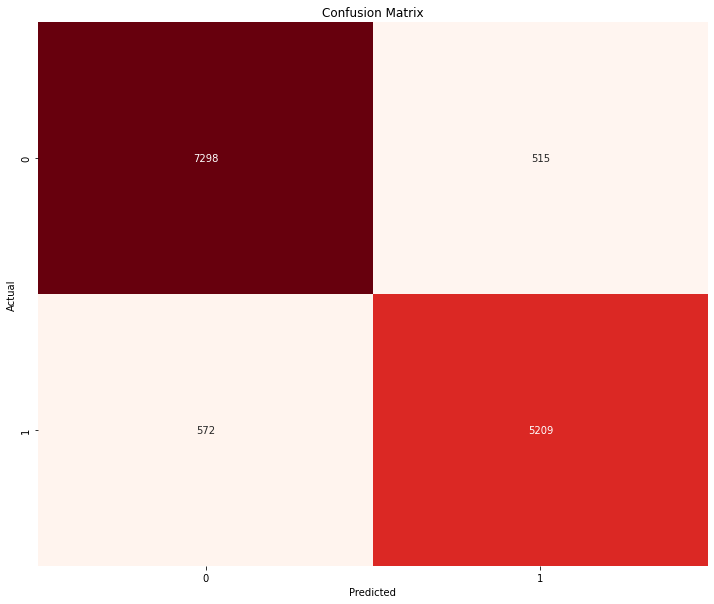

In [97]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

F1 score:  0.9055193394176445
